# Multiple Linear Regression Project

Multiple linear regression is a statistical method used to understand the relationship between a dependent variable and two or more independent variables. In the context of data science, mastering this technique is valuable as it enables professionals to assess how multiple factors impact the variable they are studying. By incorporating various independent variables such as TV, social media, radio, and influencer promotions, analysts can conduct comprehensive analyses to better inform marketing strategies and optimize sales outcomes for businesses.

To address the business request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step one: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols as ols

In [2]:
data = pd.read_csv('marketing_sales_data.csv')

In [3]:
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Sep two: Metadata and EDA

### The data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

In [4]:
#Checking for the number of null values in each column
data.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [5]:
#Dropping the nulls
data = data.dropna(axis = 0)
data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

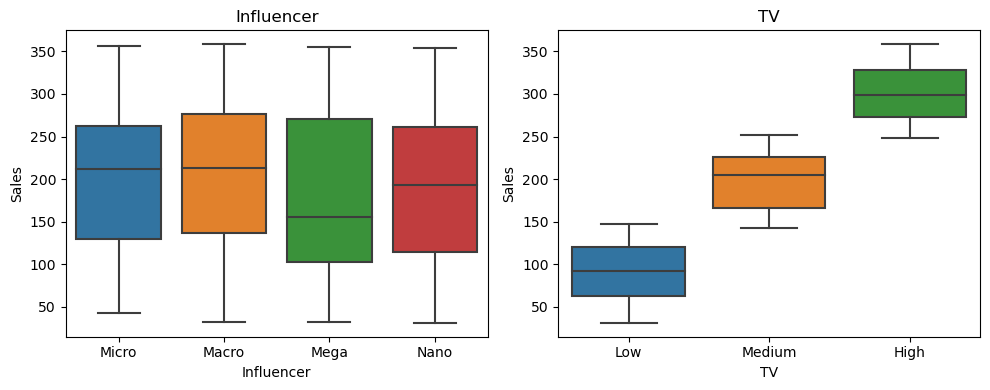

In [6]:
# Creating a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the first boxplot
sns.boxplot(data=data, x='Influencer', y='Sales', ax=axes[0])
axes[0].set_title('Influencer')

# Plotting the second boxplot
sns.boxplot(data=data, x='TV', y='Sales', ax=axes[1])
axes[1].set_title('TV')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


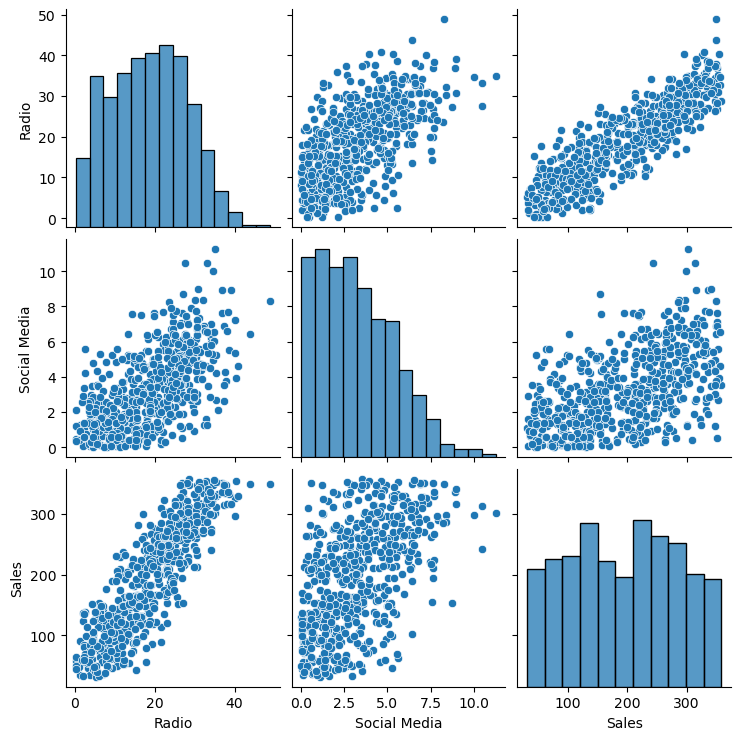

In [7]:
#A pairplot to help identify pairwise relationships in the dataset. 
sns.pairplot(data)

The pairplot suggests that both `Radio` and `Social Media` exhibit linear correlations with `Sales`. Consequently, considering their linear relationships with `Sales`, `Radio` and `Social Media` could serve as valuable independent variables in a multiple linear regression model aimed at estimating `Sales`. 

`TV` and 'Influencer' were omitted from the pairplot analysis as they are categorical variables and not numeric.

### Calculating the means for each categorical variable

In [8]:
#Mean Sales for the Influencer category
print(data.groupby('Influencer')['Sales'].mean())

print('')

#Mean Sales for the TV category
print(data.groupby('TV')['Sales'].mean())

Influencer
Macro    206.641805
Mega     180.385096
Micro    198.655080
Nano     189.742830
Name: Sales, dtype: float64

TV
High      300.529591
Low        91.716309
Medium    199.023461
Name: Sales, dtype: float64


### Renaming column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [9]:
data = data.rename(columns = {'Social Media': 'Social_Media'})

# Step three: Model buiding

For predicting `Sales`, we are going to use `Radio` as our independent variable and `TV` as our categorical variable as required. 

* `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
* `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Social Media` was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

### First fitting a multiple linear regression model that predicts sales

In [10]:
#Defining the OLS formula
ols_formula = 'Sales ~ C(TV) + Radio'

#Creating the model
OLS = ols(formula = ols_formula, data = data)

#Fitting the model
model = OLS.fit()

#Save the results summary
model_results = model.summary()

#Display results
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 20 May 2024   Prob (F-statistic):          1.61e-287
Time:                        18:03:29   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking for model assumptions

#### Model Assumption 1: Linearity

Creating a scatterplot to compare the continuous independent variables. The `Linearity` assumption ensures that each predictor variable ($X_i$) and the outcome variable ($Y$) need to be linearly related. 

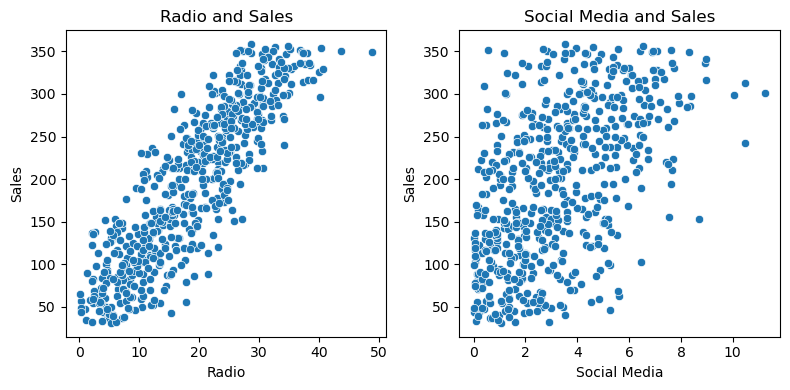

In [11]:
#Create a 1x2 plot figure. 
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

#Create scatterplot between Radio and sales. 
sns.scatterplot(x = data['Radio'], y = data['Sales'], ax = axes[0])
axes[0].set_title("Radio and Sales")

#Create a scatterplot between Social Media and Sales
sns.scatterplot(x = data['Social_Media'], y = data['Sales'], ax = axes[1])
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

plt.tight_layout()

#### Model Assumption 2: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

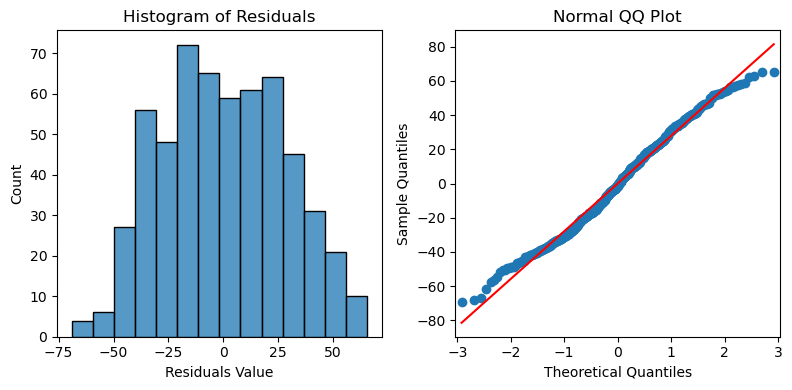

In [12]:
#Calculating the residuals
residuals = model.resid

#Create a 1x2 plot figure 
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

# Creating a histogram with the residuals.
sns.histplot(residuals, ax = axes[0])
axes[0].set_xlabel("Residuals Value")
axes[0].set_title("Histogram of Residuals")

# Creating a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title("Normal QQ Plot")

#Use matplotlib's tight_layout() function to add space for a cleaner appearance
plt.tight_layout()

plt.show()

#### Assumption 3: No multicollinearity assumption

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [13]:
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


**Interpretation of VIF Values**

Ideally, the VIF for each independent variable in our model should be below 5. 

**VIF = 1**: There is no correlation between the ith predictor and the other predictors. This indicates no multicollinearity.

**1 < VIF < 5**: There is a moderate correlation, but it is not severe enough to require corrective measures.

**VIF ≥ 5**: There is significant multicollinearity that may require correction.

**VIF > 10**: This indicates a very high correlation between predictors, often considered as a rule of thumb for serious multicollinearity problems.




The `VIF` for both independent variables `Radio` and `Social Media` is below 5. 
This gives our analysis enough statistical significance. 

#### Assumption 3: Homoscedasticity

It states that the variance of the `residuals` (the differences between observed and predicted values) is constant across all levels of the independent variables. This assumption implies that the spread or "noise" in the dependent variable is the same for all values of the independent variables.

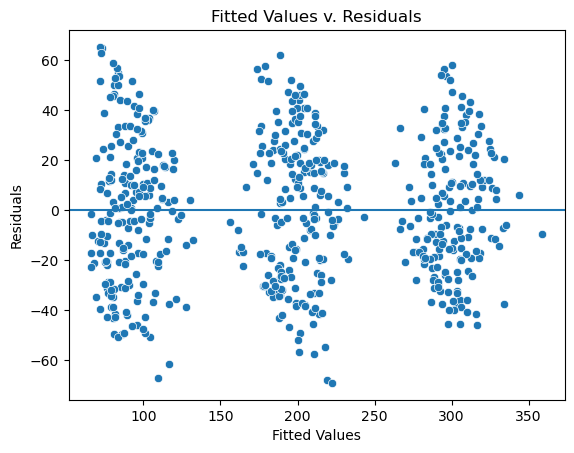

In [14]:
#Creating a scatterplot with the fitted values from model and residuals. 
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

#Adding a line at y = 0 to visualize the variance of residuals above and below 0. 
fig.axhline(0)

plt.show()

# Step four: Results and Evaluation 

In [15]:
#Displaying the model results summary
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 20 May 2024   Prob (F-statistic):          1.61e-287
Time:                        18:03:29   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the `Radio` and `TV` as independent variables in this model, $R^{2} = 0.904$. This means the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`

### Model Coefficients

In [16]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 20 May 2024   Prob (F-statistic):          1.61e-287
Time:                        18:03:29   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


When `Radio` and `TV` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  217.6367$
* $\beta_{TVLow}= -152.0897$
* $\beta_{TVMedium} = -73.4835$
* $\beta_{Radio} =  2.8864$

Here's how the relationship between `Sales` and the independent variables will be indicated as a linear equation. 

$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 217.6367 - 152.0897*X_{TVLow} - 73.4835*X_{TVMedium}+ 2.8864 *X_{Radio}$

### Interpretation of Model Coefficients

The default TV category for the model is `High`, as the coefficients for the other two TV categories, `Medium` and `Low`, are provided. The negative coefficients for the `Medium` and `Low` TV categories indicate that the average sales are lower for these categories compared to the `High` category when the Radio promotion level is the same.

For instance, the model predicts that a `Low` TV promotion results in an average decrease of `154.2971` in sales compared to a `High` TV promotion, assuming the same level of Radio promotion.

The coefficient for `Radio` is positive, which aligns with the positive linear relationship observed during the exploratory data analysis.

The p-value for all coefficients is $0.000$, indicating that all coefficients are statistically significant at the $p=0.05$ level. When presenting results to stakeholders, it is important to report the 95% confidence intervals for each coefficient.

For example, there is a 95% probability that the interval $[-162.225, -141.954]$ contains the true value of the slope for $\beta_{TVLow}$, which represents the estimated difference in promotion sales when choosing a `Low` TV promotion instead of a `High` TV promotion.

### Findings and Considerations

High `TV` promotional budgets significantly boost `Sales`. The model estimates that reducing the budget from `High` to `Medium` decreases sales by $\$75.312$ million (95% CI [-80.530, -66.437]), and reducing it from high to low decreases `Sales` by $\$154.297$ million (95% CI [-162.225, -141.954]). Additionally, the model predicts that increasing the radio promotional budget by $\$1$ million will result in a $\$2.9669$ million increase in sales (95% CI [2.460, 3.312]).

Therefore, it is recommended that the business maintain a high promotional budget for TV whenever possible and invest in radio promotions to enhance sales.

### References

Saragih, H.S. (2020). [*Marketing and Sales Dataset*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

### Model built by
Bright Sackey, 
Data Analyst 